<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/chap14/calculate_Mean_StdDeviation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# extract files to perform calculations
import zipfile
import os.path
for i in range(5):
  if(os.path.isfile(f'/content/gdrive/My Drive/school_of_ai/archive/data_part{str(i+1)}.zip')):
    print(f'Extract from data_part{str(i+1)}.zip to folder data_{str(i+1)}')
    archive = zipfile.ZipFile(f'/content/gdrive/My Drive/school_of_ai/archive/data_part{str(i+1)}.zip')
    for file in archive.namelist():
        archive.extract(file, '/content/')

Extract from data_part1.zip to folder data_1
Extract from data_part2.zip to folder data_2
Extract from data_part3.zip to folder data_3
Extract from data_part4.zip to folder data_4
Extract from data_part5.zip to folder data_5


In [0]:
!ls   /content/data_1

Depth  Fg-Bg  Fg-Bg-Mask


In [0]:
!ls   /content/data_1/Fg-Bg | wc -l
!ls   /content/data_1/Fg-Bg-Mask | wc -l
!ls   /content/data_1/Depth | wc -l

80000
80000
80000


In [0]:
!ls   /content/data_2/Fg-Bg | wc -l
!ls   /content/data_2/Fg-Bg-Mask | wc -l
!ls   /content/data_2/Depth | wc -l

80000
80000
80000


In [0]:
!ls   /content/data_3/Fg-Bg | wc -l
!ls   /content/data_3/Fg-Bg-Mask | wc -l
!ls   /content/data_3/Depth | wc -l

80000
80000
80000


In [0]:
!ls   /content/data_4/Fg-Bg | wc -l
!ls   /content/data_4/Fg-Bg-Mask | wc -l
!ls   /content/data_4/Depth | wc -l

80000
80000
80000


In [0]:
!ls   /content/data_5/Fg-Bg | wc -l
!ls   /content/data_5/Fg-Bg-Mask | wc -l
!ls   /content/data_5/Depth | wc -l

80000
80000
80000


Calculate mean and standard deviation of 400000 images( present as 5 parts)

In [0]:
from tqdm import notebook
from PIL import Image
import numpy as np
n = 0
s = np.zeros(3)
sq = np.zeros(3)
first = 0
last = 80000
for data_part in range(5):
  print(f"Enumerating images from {first} to {last} of set {data_part+1}")
  for i in notebook.tqdm(range(first,last)):
      
        img = Image.open(f'/content/data_{str(data_part+1)}/Fg-Bg/fg-bg{str(i+1)}.jpg')
        x = np.array(img)/255
        s += x.sum(axis=(0,1))
        sq += np.sum(np.square(x), axis=(0,1))
        n += x.shape[0]*x.shape[1]
  first += 80000
  last+=80000

mean = s/n
std_deviation = np.sqrt((sq/n - np.square(mean)))
print(mean, sq/n, std_deviation, n)

Enumerating images from 0 to 80000 of set 1



Enumerating images from 80000 to 160000 of set 2



Enumerating images from 160000 to 240000 of set 3



Enumerating images from 240000 to 320000 of set 4



Enumerating images from 320000 to 400000 of set 5



[0.65830478 0.61511271 0.5740604 ] [0.49294373 0.44300626 0.40174589] [0.24408717 0.2542491  0.26870159] 20070400000


**Mean and Standard Deviation of 500000 image dataset**

In [0]:
#Mean
print("Mean of dataset of 500000 images:",mean)
#standard Deviation
print("Standard Deviation of dataset f 500000 images:", std_deviation)

Mean of dataset of 500000 images: [0.65830478 0.61511271 0.5740604 ]
Standard Deviation of dataset f 500000 images: [0.24408717 0.2542491  0.26870159]


In [0]:
#calculate STd and Mean
from tqdm import notebook
from PIL import Image
import numpy as np
def find_mean_std(path,type):

    n = 0
    s = np.zeros(3)
    sq = np.zeros(3)
    first = 0
    last = 80000
    for part in range(5):
      print(f"from {first} to {last} of set {part+1}")
      for i in notebook.tqdm(range(first,last)):
          
            img = Image.open(f'/content/data_{str(part+1)}{path}{str(i+1)}.{type}')
            x = np.array(img)/255
            s += x.sum(axis=(0,1))
            sq += np.sum(np.square(x), axis=(0,1))
            n += x.shape[0]*x.shape[1]
      first += 80000
      last+=80000


    mean = s/n
    std_deviation = np.sqrt((sq/n - np.square(mean)))
    print(mean, sq/n, std_deviation, n)

In [0]:
find_mean_std(path ="/Fg-Bg-Mask/fg-bg-mask",type = "jpg" )

from 0 to 80000 of set 1



from 80000 to 160000 of set 2



from 160000 to 240000 of set 3



from 240000 to 320000 of set 4



from 320000 to 400000 of set 5



[0.04608837 0.04608837 0.04608837] [0.0443335 0.0443335 0.0443335] [0.20544916 0.20544916 0.20544916] 20070400000


In [0]:
find_mean_std(path ="/Depth/depth",type = "jpg" )


from 0 to 80000 of set 1



from 80000 to 160000 of set 2



from 160000 to 240000 of set 3



from 240000 to 320000 of set 4



from 320000 to 400000 of set 5



[0.50911522 0.50911522 0.50911522] [0.33857744 0.33857744 0.33857744] [0.28174302 0.28174302 0.28174302] 20070400000


In [0]:
from tqdm import notebook
from PIL import Image
def stack_images(path,rangea,rangeb,type,skip):
  images = []
  import torchvision
  import skimage
  import matplotlib.pyplot as plt
  import numpy as np
  for i in notebook.tqdm(range(rangea,rangeb,skip)):
        
          img = Image.open(f'/content/{path}{str(i+1)}.{type}')
          images.append(np.array(img))
  return images

In [0]:
#to display images
from tqdm import notebook
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, output, cols = 1, titles = None):
    """    images: List of np.arrays compatible with plt.imshow. 
    cols (Default = 1): Number of columns in figure 
    titles: List of titles for each image. Must have same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure(figsize=(2,2))
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        plt.axis("off")
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    fig.savefig(output)

In [0]:
from tqdm import notebook
from PIL import Image
def stack_input_images(path,rangea,rangeb,type,skip):
  images = []
  import torchvision
  import skimage
  import matplotlib.pyplot as plt
  import numpy as np
  for i in notebook.tqdm(range(rangea,rangeb,skip)):
        
          img = Image.open(f'{path}{str(i+1)}.{type}')
          images.append(np.array(img))
  return images

[Background images](**https://**)

In [57]:
bg_folder = '/content/gdrive/My Drive/school_of_ai/archive/Background'
images = stack_input(path = bg_folder + "/bg",rangea = 1,rangeb= 9,type = "jpg",skip = 1)

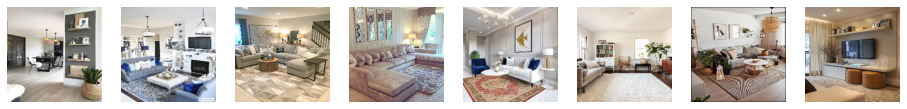

In [62]:
show_images(images, output='Background.jpg',cols = 1, titles = None)

**[Foreground](https://)**

In [63]:
fg_folder = '/content/gdrive/My Drive/school_of_ai/archive/Foreground'
images = stack_input(path = fg_folder + "/fg",rangea = 1,rangeb= 9,type = "png",skip = 1)

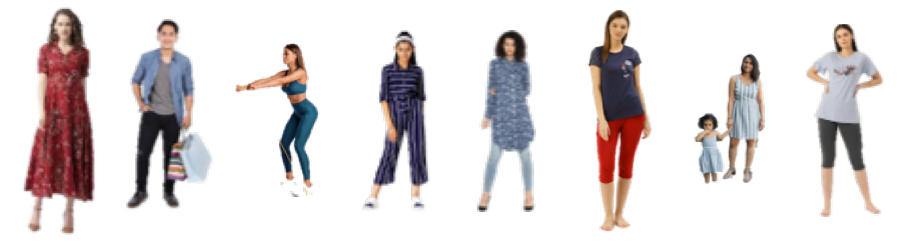

In [64]:
show_images(images, output='Foreground.jpg',cols = 1, titles = None)

# [**Mask**](**https://**)

In [65]:
mask_folder = '/content/gdrive/My Drive/school_of_ai/archive/Mask'
images = stack_input(path = mask_folder + "/mask",rangea = 1,rangeb= 9,type = "jpg",skip = 1)

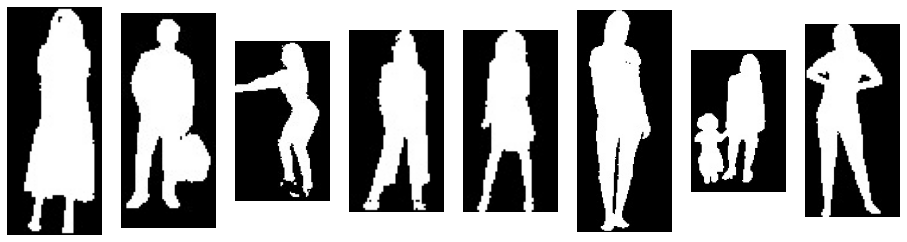

In [66]:
show_images(images, output='mask.jpg',cols = 1, titles = None)

**[FG-Bg images](https://)**

In [67]:
images = stack_images(path = "data_1/Fg-Bg/fg-bg",rangea = 100,rangeb= 900,type = "jpg",skip = 100)

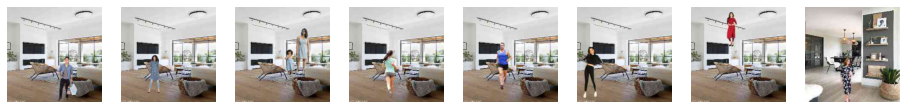

In [68]:
show_images(images, output='Fg-Bg.jpg',cols = 1, titles = None)

***[Fg-Bg-Mask](https://)***

In [69]:
images = stack_images(path = "data_1/Fg-Bg-Mask/fg-bg-mask",rangea = 100,rangeb= 900,type = "jpg",skip = 100)

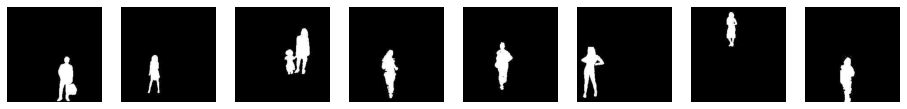

In [70]:
show_images(images, output='Fg-Bg-Mask.jpg',cols = 1, titles = None)

**[Depth images](https://)**

In [71]:
images = stack_images(path = "data_1/Depth/depth",rangea = 100,rangeb= 900,type = "jpg",skip = 100)

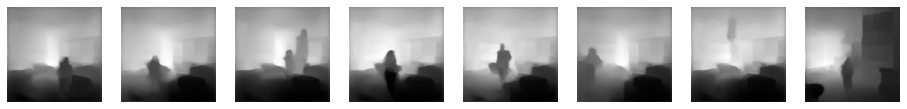

In [72]:
show_images(images, output='Depth.jpg',cols = 1, titles = None)